In [28]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 12.1 MB/s eta 0:00:00


In [79]:
import gymnasium as gym
import numpy as np
import random

env = gym.make('CartPole-v1')
obs, _ = env.reset()
binmax = [4.8, 4, 0.418, 4]

bins = np.array([np.linspace(-a, a, bin) for a in binmax])

In [173]:
def discretize_obs(obs, bins):
  return tuple(np.argmin(np.abs(obs[:,np.newaxis]-bins), axis=1))

In [162]:
def get_action(qtable, eps, inds ):
  n = random.random()
  if n < eps:
    return random.randint(0,1)
  else:
    return int(np.argmax(qtable[inds]))

In [200]:
qtable = np.zeros((20,20,20,20,2))

eps = 1
alpha = 0.1
min_eps = 0.1
decay = 0.9995
episodes = 20000
bin = 20
gamma = 0.95
steps = []

for ep in range(episodes):
  final_done = False
  obs, _ = env.reset()
  len = 0
  while not final_done:
    inds = list(discretize_obs(obs, bins))
    action = get_action(qtable, eps, tuple(inds))
    next_obs, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated
    if done and len < 500:
      reward = -200
    max_next = np.max(qtable[discretize_obs(next_obs, bins)])
    qtable[tuple(inds+[action])] = qtable[tuple(inds + [action])] + alpha * (reward + gamma * max_next - qtable[tuple(inds + [action])])
    obs = next_obs
    len+=1
    final_done = done
  steps.append(len)
  print(f"Episode {ep}, steps: {len}, final reward: {reward}, eps: {eps}")
  if ep % 3 == 0:
    eps = max(min_eps, eps * decay)

Streaming output truncated to the last 5000 lines.
Episode 15000, steps: 342, final reward: -200, eps: 0.1
Episode 15001, steps: 289, final reward: -200, eps: 0.1
Episode 15002, steps: 172, final reward: -200, eps: 0.1
Episode 15003, steps: 230, final reward: -200, eps: 0.1
Episode 15004, steps: 238, final reward: -200, eps: 0.1
Episode 15005, steps: 201, final reward: -200, eps: 0.1
Episode 15006, steps: 258, final reward: -200, eps: 0.1
Episode 15007, steps: 262, final reward: -200, eps: 0.1
Episode 15008, steps: 240, final reward: -200, eps: 0.1
Episode 15009, steps: 192, final reward: -200, eps: 0.1
Episode 15010, steps: 280, final reward: -200, eps: 0.1
Episode 15011, steps: 277, final reward: -200, eps: 0.1
Episode 15012, steps: 421, final reward: -200, eps: 0.1
Episode 15013, steps: 154, final reward: -200, eps: 0.1
Episode 15014, steps: 136, final reward: -200, eps: 0.1
Episode 15015, steps: 156, final reward: -200, eps: 0.1
Episode 15016, steps: 329, final reward: -200, eps: 0

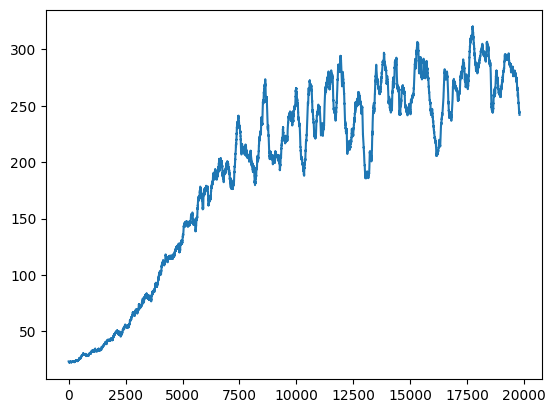

In [211]:
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    cumsum = np.cumsum(np.insert(data, 0, 0))
    return (cumsum[window_size:] - cumsum[:-window_size]) / window_size

window_size = 200

smoothed_data = moving_average(steps, window_size)
plt.plot(smoothed_data)

In [219]:
# https://stackoverflow.com/questions/77042526/how-to-record-and-save-video-of-gym-environment
import gymnasium as gym

###
# create a temporary variable with our env, which will use rgb_array as render mode. This mode is supported by the RecordVideo-Wrapper
tmp_env = gym.make("CartPole-v1", render_mode="rgb_array")

# wrap the env in the record video
env = gym.wrappers.RecordVideo(env=tmp_env,video_folder="/content/sample_data",name_prefix="test-video", episode_trigger=lambda x: x % 1 == 0)

# env reset for a fresh start
obs, info = env.reset()

###
# Start the recorder
env.start_video_recorder()


# AI logic
for _ in range(200):
    # action = env.action_space.sample()  # agent policy that uses the observation and info
    inds = list(discretize_obs(obs, bins))
    action = get_action(qtable, eps, tuple(inds))
    obs, reward, terminated, truncated, _ = env.step(action)

    env.render()

    if terminated or truncated:
        observation, info = env.reset()

####
# Don't forget to close the video recorder before the env!
env.close_video_recorder()

# Close the environment
env.close()


/usr/local/lib/python3.10/dist-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /content/sample_data folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/sample_data/test-video-episode-0.mp4.
Moviepy - Writing video /content/sample_data/test-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/sample_data/test-video-episode-0.mp4
Moviepy - Building video /content/sample_data/test-video-episode-0.mp4.
Moviepy - Writing video /content/sample_data/test-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/sample_data/test-video-episode-0.mp4
